In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
! rm -rf sample_data/

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [4]:
def predict_with_prob(model, img_path):
    # Load image and preprocess it
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    
    # Make prediction
    prediction = model.predict(img_array)
    class_labels = {0: 'NoDR', 1: 'Mild', 2: 'Moderate', 3: 'Severe', 4: 'ProliferativeDR'}
    class_probs = {class_labels[i]: float(prediction[0][i]) for i in range(len(class_labels))}
    
    return class_probs

In [5]:
model = load_model('/content/drive/MyDrive/Model/Final51.h5')

1/1 [==============================] - 4s 4s/step


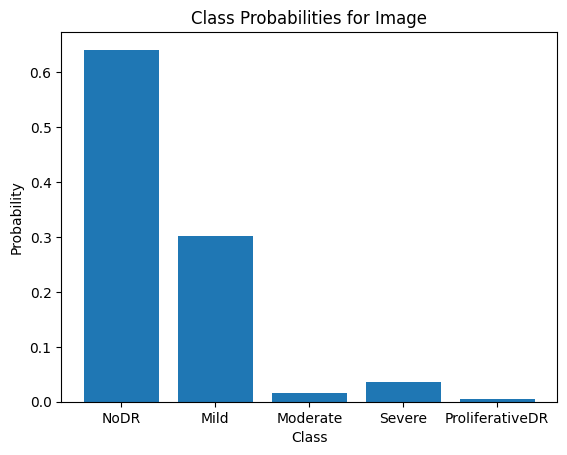

In [6]:

# Define the image path and model
img_path = '/content/drive/MyDrive/Model/alien/NoDR/fce93caa4758.png'
model = model

# Get the class probabilities for the image
class_probs = predict_with_prob(model, img_path)

# Create a bar chart of the probabilities
fig, ax = plt.subplots()
ax.bar(class_probs.keys(), class_probs.values())
ax.set_xlabel('Class')
ax.set_ylabel('Probability')
ax.set_title('Class Probabilities for Image')
plt.show()